# Chapter 11. A Virtual Screening Workflow Example 

## Introduction 

* Virtal screening methods are often grouped into two categories, ***structure-based virtual screening*** and ***ligand-based virtual screening***

     1. **Structure-based virtual screen**:
         * used to identify molecules that will optimally fit into binding site.
     
     2. **Ligand-based virtual screen**:
         * search for molecules that function similarly to one or more known molecules. 

## Preparing a Dataset for Predictive Modeling

### Step 1. Upload data and create a dataframe to build a model.
* to predict the ability of molecules to inhibit a protein known as ERK2. 
    * ERK2 plays an important role in the signaling pathways that regualte how cells multiply.

In [26]:
from rdkit import Chem              # RDKit libraries for chemistry functions 
from rdkit.Chem import Draw         # Drawing chemical structures 
import pandas as pd                 # Dealing with data in tables
from rdkit.Chem import PandasTools  # Manipulating chemical data 
from rdkit.Chem import Descriptors  # Calculating molecular descriptors 
from rdkit.Chem import rdmolops     # Additional molecular properties 
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem

* Now we can read a SMILES file into a Pandas dataframe and add an RDKit molecule to the dataframe.

In [2]:
active_df = pd.read_csv("mk01/actives_final.ism",header=None,sep=" ")
active_rows,active_cols = active_df.shape
active_df.columns = ["SMILES","ID","ChEMBL_ID"]
active_df["label"] = ["Active"]*active_rows
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")

* Then we can define a function to add the calculated propertis to a dataframe. 
* With this function in hand, we can calculate the mw, LogP, and formal charge of the molecules. 

In [3]:
def add_property_columns_to_df(df_in):
    df_in["mw"] = [Descriptors.MolWt(mol) for mol in df_in.Mol]
    df_in["logP"] = [Descriptors.MolLogP(mol) for mol in df_in.Mol]
    df_in["charge"] = [rdmolops.GetFormalCharge(mol) for mol in df_in.Mol]

* Once we have these properties listed before, we can compare the distributions for the active and decoy sets

In [4]:
add_property_columns_to_df(active_df)

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,CHEMBL318804,Active,,565.099,5.49788,0
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,CHEMBL162,Active,,466.541,4.35400,0
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,CHEMBL576683,Active,,527.915,4.96202,0
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,CHEMBL571484,Active,,491.935,4.36922,0
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,CHEMBL568937,Active,,487.991,5.12922,0

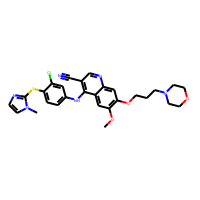
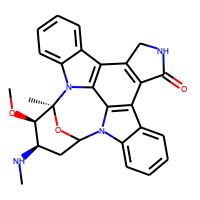
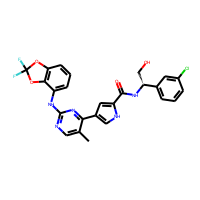
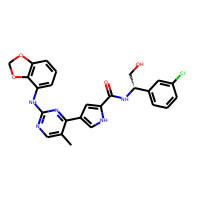
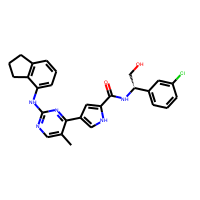

In [5]:
active_df.head()

* Now we can do the same thing with the decoy molecules

In [6]:
decoy_df = pd.read_csv('mk01/decoys_final.ism', header=None, sep= " ")
decoy_df.columns = ['SMILES','ID']
decoy_rows, decoy_cols = decoy_df.shape
decoy_df['label'] = ['Decoy']*decoy_rows
PandasTools.AddMoleculeColumnToFrame(decoy_df,"SMILES", 'Mol')
add_property_columns_to_df(decoy_df)

* In order to build a model, we need a **single dataframe** with both active and decoy molecules.
* We can use pandas ***append** function to add two dataframes and create a new dataframe

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,CHEMBL318804,Active,,565.099,5.49788,0
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,CHEMBL162,Active,,466.541,4.35400,0
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,CHEMBL576683,Active,,527.915,4.96202,0
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,CHEMBL571484,Active,,491.935,4.36922,0
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,CHEMBL568937,Active,,487.991,5.12922,0

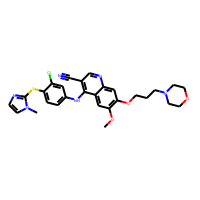
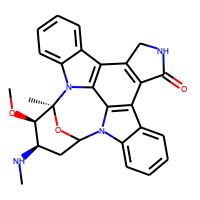
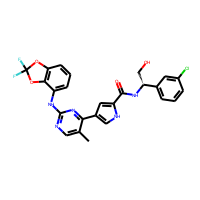
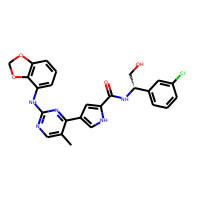
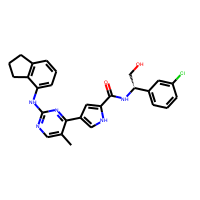

In [7]:
tmp_df = active_df.append(decoy_df)
tmp_df.head()

### Step 2. Compare the properties of the two sets of molecules. 
* To do the comparison, we will use violin plots that provides a mirrored, horizontal view of a frequency distribution. 

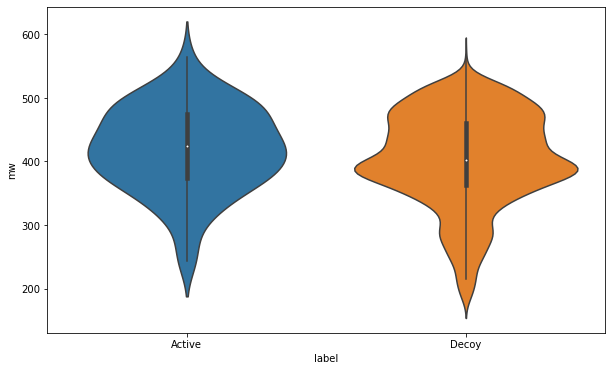

In [14]:
# Violin plot: molecular weight for the active and decoy sets. 

plt.figure(figsize=(10,6))
sns.violinplot(tmp_df['label'], tmp_df['mw'])

# Plot shows that molecular weight distributions for the 2 sets are roughly equivalent.
# The decoy set has more low molecular weight molecules,
# but the center of the distribution, shown as a box in the middle of each violin plot, is in a similar location in both plots. 

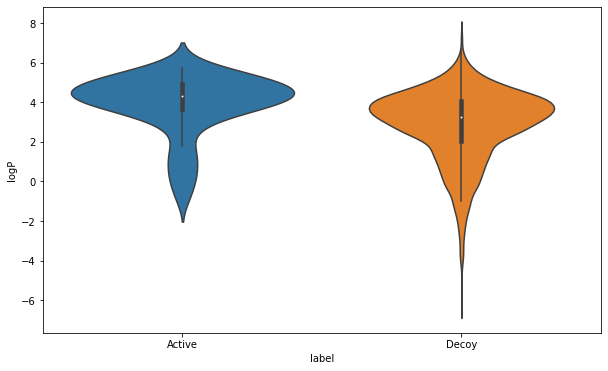

In [15]:
# Violin plot: LogP distributions 
plt.figure(figsize=(10,6))
sns.violinplot(tmp_df['label'], tmp_df['logP'])

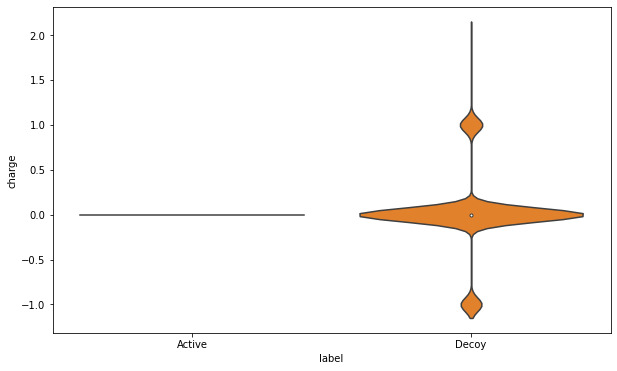

In [16]:
# Violin plot: formal charges 
plt.figure(figsize=(10,6))
sns.violinplot(tmp_df["label"],tmp_df["charge"])

# We can see all the active molecules are neutral, having charges of 0, while some of the decoys are charged, with charges of +1 or -1. 

* Then let's see what fraction of the decoy molecules are charged. 
* We can do this by creating a new dataframe with just the charged molecules. 

In [17]:
charged = decoy_df[decoy_df['charge']!=0]

In [18]:
charged.shape[0] # shape returns rows and columns

736

In [19]:
charged.shape[0]/decoy_df.shape[0] # Approximately 16% of the decoy molecules are charged. 

0.16175824175824177

### Step 3. Neutralize the charged molecules

* !!16% of the decoy molecules are charged!!:

    * This appears to be because the active and decoy sets were not prepared in a consistent fashion. 
    * We can address this problem by **modifying the chemical structures of the decoy molecules to neutralize their charges**
        * **NeutraliseCharges ( )** function from the RDKit Cookbook

In [20]:
from neutralize import NeutraliseCharges

ModuleNotFoundError: No module named 'neutralize'

In [21]:
# Becuase the module could not be found, I copy and paste the code from 
# https://rdkit.readthedocs.io/en/latest/Cookbook.html#neutralizing-charged-molecules
# to make sure NeutraliseCharges could be settled down. 

def _InitialiseNeutralisationReactions():
    patts= (
        # Imidazoles
        ('[n+;H]','n'),
        # Amines
        ('[N+;!H0]','N'),
        # Carboxylic acids and alcohols
        ('[$([O-]);!$([O-][#7])]','O'),
        # Thiols
        ('[S-;X1]','S'),
        # Sulfonamides
        ('[$([N-;X2]S(=O)=O)]','N'),
        # Enamines
        ('[$([N-;X2][C,N]=C)]','N'),
        # Tetrazoles
        ('[n-]','[nH]'),
        # Sulfoxides
        ('[$([S-]=O)]','S'),
        # Amides
        ('[$([N-]C=O)]','N'),
        )
    return [(Chem.MolFromSmarts(x),Chem.MolFromSmiles(y,False)) for x,y in patts]

In [22]:
_reactions=None
def NeutraliseCharges(smiles, reactions=None):
    global _reactions
    if reactions is None:
        if _reactions is None:
            _reactions=_InitialiseNeutralisationReactions()
        reactions=_reactions
    mol = Chem.MolFromSmiles(smiles)
    replaced = False
    for i,(reactant, product) in enumerate(reactions):
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = AllChem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    if replaced:
        return (Chem.MolToSmiles(mol,True), True)
    else:
        return (smiles, False)

In [23]:
# Create a new dataframe with the SMILES strings, IDs, and labels for the decoys
revised_decoy_df = decoy_df[['SMILES','ID','label']].copy()

* Now we can replace the original SMILES strings with the strings fro the neutral forms of the molecules. 

* The **NeutraliseCharges( )** function returns two values: 

    1. The first is the SMILES string for the neutral form of the molecule. 
    2. The second is a Boolean variable indicating whether the molecule was changed. 

In [27]:
# We only need the SMILES strings 
revised_decoy_df['SMILES'] = [NeutraliseCharges(x)[0] for x in revised_decoy_df['SMILES']]

In [28]:
# Add a molecule column to our new dataframe and calcuate the properties again

PandasTools.AddMoleculeColumnToFrame(revised_decoy_df,"SMILES","Mol")
add_property_columns_to_df(revised_decoy_df)

In [29]:
# Append the dataframe with the active molecules to the one with the revised, neutral decoys:
new_tmp_df = active_df.append(revised_decoy_df)

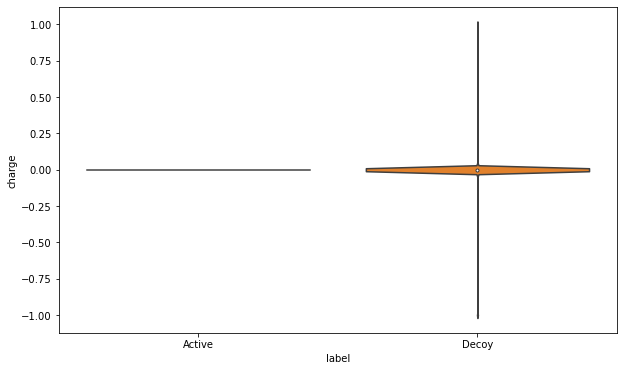

In [30]:
# Now we can generate a new boxplot to compare the charge distributions of the active molecules with those 
# of our neutralized decoys 

plt.figure(figsize=(10,6))
sns.violinplot(new_tmp_df['label'], new_tmp_df['charge'])
# We can see there is only very few charged molecues in the decoy set 

In [31]:
# Use same technique we used earlier to create a dataframe with only the charged molecules. 

charged = revised_decoy_df[revised_decoy_df['charge']!=0]
charged.shape[0]/revised_decoy_df.shape[0]

# We have reduced the fraction of charged molecules from 16% to 0.3% 
# Now our active and decoy sets are reasonably well balanced. 

0.0026373626373626374

### Step 4. Wrtie the molecules out as a CSV
* in order to use these datasets with DeepChem

In [32]:
active_df['is_active'] = [1] * active_df.shape[0]
revised_decoy_df['is_active'] = [0] * revised_decoy_df.shape[0]
combined_df = active_df.append(revised_decoy_df)[['SMILES','ID','is_active']]
combined_df.head()

,SMILES,ID,is_active
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,1
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,1
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,1
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,1
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,1


In [33]:
# Save our new dataframe
combined_df.to_csv('dude_erk1_mk01.csv', 
                  index = False) # causes Pandas to not include the row number in the first column 

### Step 5. Training a predictive model 

In [34]:
import deepchem as dc                       # DeepChem libraries 
from deepchem.models import GraphConvModel  # Graph convolutions 
import numpy as np                          # Numpy for numeric operations 
import sys                                  # Error handling
import pandas as pd                         # Data table manipulation 
import seaborn as sns                       # Seaborn library for plotting
from rdkit.Chem import PandasTools          # Chemical structures in Pandas 

In [35]:
# Define a fuction to create a GraphCovModel. 
# In this case, we will be creating a classification model 
# Then we store the model for further interest 

def generate_graph_conv_model():
    batch_size = 128
    model = GraphConvModel(1, batch_size=batch_size, mode='classification',model_dir="./model_dir")
    return model

In [36]:
# In order to train the model, first we read in the csv we created 

dataset_file = 'dude_erk1_mk01.csv'
tasks = ['is_active']
featurizer = dc.feat.ConvMolFeaturizer()
loader = dc.data.CSVLoader(tasks=tasks, feature_field="SMILES", featurizer=featurizer)
dataset = loader.featurize(dataset_file, shard_size=8192)

/opt/anaconda3/lib/python3.8/site-packages/deepchem/data/data_loader.py:160: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


In [37]:
# Create training and test sets to evaluate the model's performance. 
splitter = dc.splits.RandomSplitter()

* DeepChem offers a number of other splitters, too 
    1. ***ScaffoldSplitter*** : divides the dataset by chemical scaffold. 
    2. ***ButinaSplitter***: first clusters the data then splits the dataset so that different clusters end up in the training and test sets

### Step 6. Define metrics and Evaluate model performance

* In this case, our dataset is unblanced: we have a small number of active compounds and a large number of inactive compounds. Thus, we need to use a **metric** that reflects the performance on unbalanced datasets.
* We are using **Matthews correlation coefficient (MCC)** here 

In [38]:
metrics = [dc.metrics.Metric(dc.metrics.matthews_corrcoef, np.mean, mode="classification")]

In [39]:
# In order to evaluate the performance of our model, we will perform 10 folds of cross validation

training_score_list = []
validation_score_list = []
transformers = []

In [40]:
cv_folds = 10
for i in range(0,cv_folds):
    model = generate_graph_conv_model()
    train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)
    model.fit(train_dataset)
    train_scores = model.evaluate(train_dataset, metrics, transformers)
    training_score_list.append(train_scores["mean-matthews_corrcoef"])
    validation_scores = model.evaluate(valid_dataset, metrics, transformers)
    validation_score_list.append(validation_scores["mean-matthews_corrcoef"])
print(training_score_list)
print(validation_score_list)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets